## ResNet 50 model을 사용

In [34]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchmetrics.classification import F1Score, Accuracy

In [35]:
## ==> 이미지 데이터 존재하는 폴더 경로 설정
img_dir = './Dataset/'
img_train = img_dir + 'Test'
## ==> 이미지 데이터셋 변환 : 지정된 경로 아래
imgDS = ImageFolder(root=img_train, transform=transforms.ToTensor())

In [36]:
from torchvision import datasets, transforms
from torchvision.models import resnet50, ResNet50_Weights

In [82]:
data_transform =transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 
])

In [83]:
train_imgDS = ImageFolder(root=img_dir + 'Train', transform=data_transform)
val_imgDS = ImageFolder(root=img_dir + 'Validation', transform=data_transform)

[Image Dataset]
Dataset ImageFolder
    Number of datapoints: 10905
    Root location: ./Dataset/Test
    StandardTransform
Transform: ToTensor()
[classes] ['Fake', 'Real'], {'Fake': 0, 'Real': 1}
[Targets] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

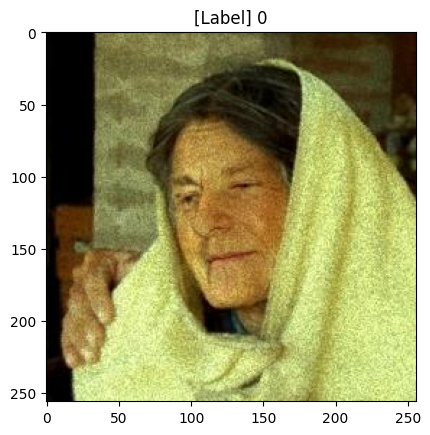

In [39]:
print(f'[Image Dataset]\n{imgDS}')
print(f'[classes] {imgDS.classes}, {imgDS.class_to_idx}')
print(f'[Targets] {imgDS.targets}')
print('[imgs]')
for item in imgDS.imgs: 
    print(item)
for item in imgDS.imgs:
    img=imgDS.loader(item[0])
    plt.imshow(img)
    plt.title(f'[Label] {item[1]}')
    plt.show()
    break

In [51]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [52]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [97]:
model=torch.load('best_model4.pth', weights_only=False).to(DEVICE)

In [71]:
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               

In [98]:
for param in model.parameters():
    param.requires_grad = False

In [76]:
num_features

2048

In [79]:
# 이진분류로 바꿔주기
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1000),
    nn.ReLU(), 
    nn.Linear(1000, 2) 
)

In [100]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [99]:
for param in model.fc.parameters():
    param.requires_grad = True

In [101]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [102]:
EPOCH = 15
BATCH_SIZE =  32
LR = 0.0002
accuracy_metric = Accuracy(task='binary').to(DEVICE)
crossloss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=LR)
trainDL = DataLoader(train_imgDS, batch_size=BATCH_SIZE, shuffle=True)
valDL= DataLoader(val_imgDS, batch_size=BATCH_SIZE, shuffle=False)

In [93]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1)

In [103]:
best_val_accuracy = 0.0  # 초기 정확도는 0으로 설정 (클수록 좋음)
patience = 10  # 개선되지 않으면 기다릴 에포크 수
trigger_times = 0  

In [104]:
LOSS_HISTORY, ACCURACY_HISTORY = [[], []], [[], []]
for epoch in range(1,EPOCH+1) :
    model.train()
    
    loss_total =0
    accuracy_metric.reset()
    for feature, target in trainDL:
        feature = feature.to(DEVICE)
        target = target.to(DEVICE)
        
        pre_y = model(feature)

        loss = crossloss(pre_y, target)

        # 성능평가 계산
        loss_total += loss.item()
        
        # 최적화 진행
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        probs = torch.softmax(pre_y,dim=1)
        predictions = torch.argmax(probs, dim=1)
        accuracy_metric.update(predictions, target)
    
    avg_loss =loss_total / len(trainDL)
    avg_accuracy = accuracy_metric.compute().item()*100

    LOSS_HISTORY[0].append(avg_loss)
    ACCURACY_HISTORY[0].append(avg_accuracy)

    print(f'[{epoch}/{EPOCH}]\n - TRAIN LOSS : {avg_loss} - Train Accuracy : {avg_accuracy}')

    model.eval()
    accuracy_metric.reset()
    val_loss_total =0
    with torch.no_grad():
        for feature, target in valDL:
            feature = feature.to(DEVICE)
            target = target.to(DEVICE)

            pre_val = model(feature)
            
            loss = crossloss(pre_val, target)

            val_loss_total += loss.item()

            probs = torch.softmax(pre_val,dim=1)
            predictions = torch.argmax(probs, dim=1)
            accuracy_metric.update(predictions, target)
    
    avg_val_loss =val_loss_total / len(valDL)
    avg_val_accuracy = accuracy_metric.compute().item()*100
    
    scheduler.step()
    LOSS_HISTORY[1].append(avg_val_loss)
    ACCURACY_HISTORY[1].append(avg_val_accuracy)
    print(f'- VAL LOSS : {avg_val_loss} - VAL Accuracy : {avg_val_accuracy}')

    if avg_val_accuracy > best_val_accuracy:  # 정확도 기준으로 변경
        best_val_accuracy = avg_val_accuracy  # 최고 정확도 갱신
        trigger_times = 0  # 트리거 리셋
        torch.save(model, f'best_model{epoch}.pth')  # 최상의 모델 저장
    else:
        trigger_times += 1
        print(f'Early stopping trigger times: {trigger_times}/{patience}')
        
        if trigger_times >= patience:
            print("Early stopping!")
            break

[1/15]
 - TRAIN LOSS : 0.16197837191170772 - Train Accuracy : 93.46223473548889
- VAL LOSS : 0.3210810848020507 - VAL Accuracy : 87.61540055274963
[2/15]
 - TRAIN LOSS : 0.15630245466130893 - Train Accuracy : 93.63866448402405
- VAL LOSS : 0.320039464786969 - VAL Accuracy : 88.09982538223267
[3/15]
 - TRAIN LOSS : 0.14855709441207943 - Train Accuracy : 94.01437044143677
- VAL LOSS : 0.3236984132726005 - VAL Accuracy : 88.14801573753357
[4/15]
 - TRAIN LOSS : 0.14364398691664454 - Train Accuracy : 94.30508017539978
- VAL LOSS : 0.32464044557190186 - VAL Accuracy : 87.95779943466187
Early stopping trigger times: 1/10
[5/15]
 - TRAIN LOSS : 0.13956910237743156 - Train Accuracy : 94.451504945755
- VAL LOSS : 0.33439247882777684 - VAL Accuracy : 88.04910182952881
Early stopping trigger times: 2/10
[6/15]
 - TRAIN LOSS : 0.13231955432985149 - Train Accuracy : 94.72793340682983
- VAL LOSS : 0.33232717775507087 - VAL Accuracy : 88.1733775138855
[7/15]
 - TRAIN LOSS : 0.12907383183972532 - Trai

In [105]:
def plot_loss_score(LOSS_HISTORY, SCORE_HISTORY, title, THRESHOLD = None):

    if THRESHOLD is None:
        THRESHOLD=len(LOSS_HISTORY[1])
    

    fg, axes=plt.subplots(1,2,figsize=(10,5))
    axes[0].plot(range(1, THRESHOLD+1), LOSS_HISTORY[0][:THRESHOLD], label='Train')
    axes[0].plot(range(1, THRESHOLD+1), LOSS_HISTORY[1][:THRESHOLD], label='Val')
    axes[0].grid()
    axes[0].legend()
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Epoch&Loss')

    axes[1].plot(range(1, THRESHOLD+1), SCORE_HISTORY[0][:THRESHOLD], label='Train')
    axes[1].plot(range(1, THRESHOLD+1), SCORE_HISTORY[1][:THRESHOLD], label='Val')
    axes[1].grid()
    axes[1].legend()
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel(title)
    axes[1].set_title(f'Epoch&{title}')
    plt.tight_layout()
    plt.show()

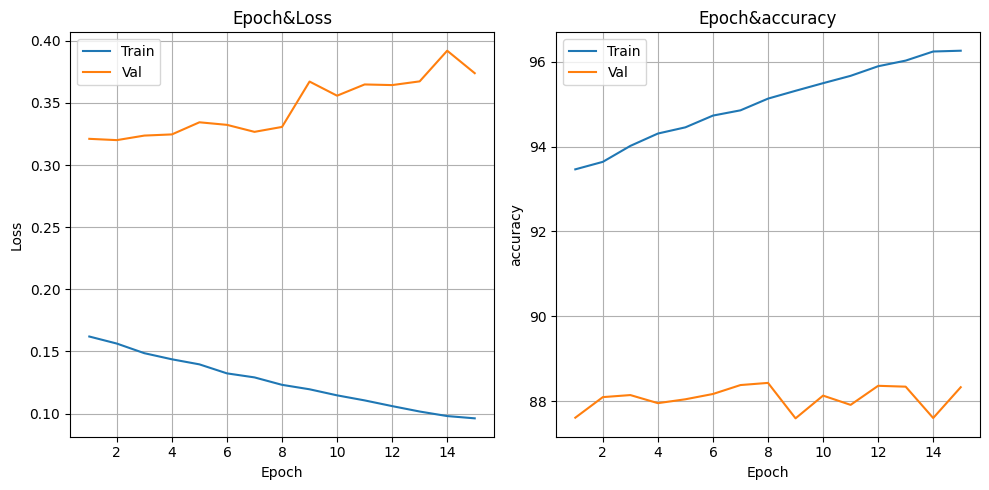

In [107]:
plot_loss_score(LOSS_HISTORY, ACCURACY_HISTORY, 'accuracy')

In [26]:
#SAVE_MODEL = 'best_model'
# torch.save(model, SAVE_MODEL)

In [27]:
#model=torch.load(SAVE_MODEL, weights_only=False).to(DEVICE)